In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

LOADING DATASET (TWITTER DATA)

In [3]:
dataset_path = r"D:\Datasets\Reddit_Data.csv\Reddit_Data.csv"
df = pd.read_csv(dataset_path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [5]:
df = df.rename(columns={'clean_text': 'text'})

In [6]:
# Display the first few rows of the dataset
print("Original Dataset:")
print(df.head())

Original Dataset:
                                       clean_comment  category
0   family mormon have never tried explain them t...         1
1  buddhism has very much lot compatible with chr...         1
2  seriously don say thing first all they won get...        -1
3  what you have learned yours and only yours wha...         0
4  for your own benefit you may want read living ...         1


DATA PREPROCESSING

In [7]:
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [8]:
df.shape

(37249, 2)

In [9]:
df['category'].unique()

array([ 1, -1,  0], dtype=int64)

In [10]:
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df.isna().sum()

clean_comment    0
category         0
dtype: int64

In [13]:
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [18]:
# Preprocess the text data
def preprocess_text(text):
    
    # Check if the value is NaN
    if pd.isna(text):
        return ""

    # Convert text to lowercase
    text = text.lower()
    
    # Remove emojis
    text = text.encode('ascii', 'ignore').decode('ascii')

    # Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)

    return tokens

In [19]:
text = df["clean_comment"].apply(preprocess_text)
df["clean_comment"] = text

In [20]:
print("Preprocessed Dataset:")
print(df.head())

Preprocessed Dataset:
                                       clean_comment  category
0  [family, mormon, have, never, tried, explain, ...         1
1  [buddhism, has, very, much, lot, compatible, w...         1
2  [seriously, don, say, thing, first, all, they,...        -1
3  [what, you, have, learned, yours, and, only, y...         0
4  [for, your, own, benefit, you, may, want, read...         1


DATA VISUALISATION

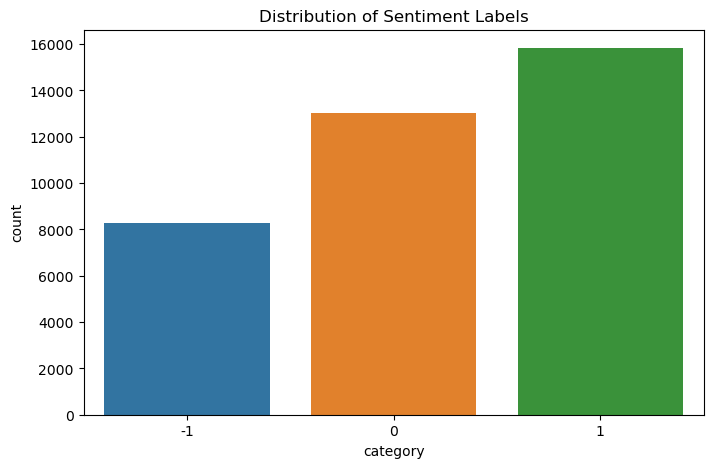

In [21]:
# Distribution of sentiment labels
plt.figure(figsize=(8, 5))
sns.countplot(x='category', data=df)
plt.title('Distribution of Sentiment Labels')
plt.show()

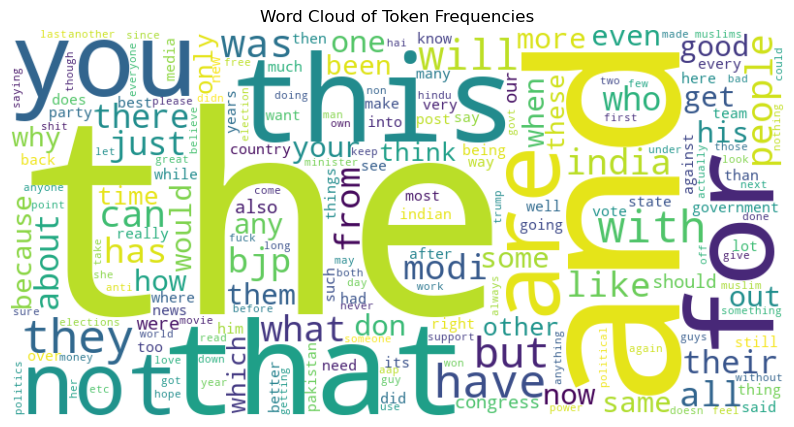

In [24]:
# Analyzing the frequency of words in the dataset

from collections import Counter
from wordcloud import WordCloud

# Tokenize and count word frequencies
all_tokens = [token for sublist in text for token in sublist]
word_freq = Counter(all_tokens)

# Word cloud visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Token Frequencies')
plt.show()

FEATURE EXTRACTION

Convert the preprocessed text data into numerical features using TF-IDF

In [25]:
text_data = text.astype(str).tolist()

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the preprocessed text data
tfidf_features = tfidf_vectorizer.fit_transform(text_data)

# Convert sparse matrix to dense array
tfidf_features_array = tfidf_features.toarray()

# Display the TF-IDF features
print(tfidf_features_array)

[[0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.1772759 0.        0.       ]
 ...
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]]


TRAIN TEST SPLIT

In [27]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_features_array, df['category'], test_size=0.2, random_state=42)

MODEL SELECTION, TRAINING AND PREDICTION

In [29]:
model = LogisticRegression()

In [30]:
model.fit(X_train, y_train)

LogisticRegression()

In [31]:

# Make predictions on the test dataset
y_pred = model.predict(X_test)

MODEL EVALUATION

In [33]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100, "%")

Accuracy: 83.13593539703903 %


In [34]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.81      0.61      0.69      1597
           0       0.81      0.96      0.88      2654
           1       0.86      0.83      0.85      3179

    accuracy                           0.83      7430
   macro avg       0.83      0.80      0.81      7430
weighted avg       0.83      0.83      0.83      7430



DEPLOYMENT

In [35]:
import joblib

# Save the trained model
joblib.dump(model, 'sentiment_analysis_model.pkl')

['sentiment_analysis_model.pkl']

In [36]:
# Load the trained model
model = joblib.load(r"C:\Users\rajen\practice_class\news_headline_sentiment_analysis\sentiment_analysis_model.pkl")

In [37]:
def predict(input_text):
    # Reshape the input text into a 2D array with a single column
    input_data = np.array([input_text]).reshape(-1, 1)

    # # Transform the input text into TF-IDF features using the fitted vectorizer
    input_data = tfidf_vectorizer.transform([input_text])

    # Make predictions using the reshaped input data
    prediction = model.predict(input_data)[0]
    
    return prediction

In [38]:
input_text = "I am doing good!"

# Print the prediction
print("Predicted sentiment:", predict(input_text))

Predicted sentiment: 1


In [39]:
input_text = "I am sad"

# Print the prediction
print("Predicted sentiment:", predict(input_text))

Predicted sentiment: -1


In [42]:
input_text = "Hello i are you stupid"

# Print the prediction
print("Predicted sentiment:", predict(input_text))

Predicted sentiment: -1
